In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
x = iris.data
y = iris.target

In [5]:
x.shape

(150, 4)

In [6]:
y.shape

(150,)

In [7]:
df = pd.DataFrame(x, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
df.columns = ["sepal length", "sepal width", "petal length", "petal width"]
df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

In [10]:
scaler1 = StandardScaler()
scaler1.fit(df)
scaled_df = scaler1.transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale= 1.2)

<AxesSubplot:>

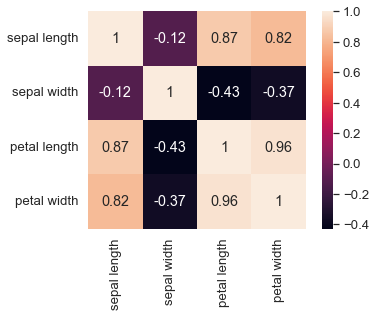

In [12]:
sns.heatmap(data=scaled_df.corr(), square=True, annot=True)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,y,random_state=0)

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((112, 4), (112,), (38, 4), (38,))

In [15]:
X_scaled1 = scaler1.transform(X_train)
X_test_sc1 = scaler1.transform(X_test)
X_scaled1[0:3]

array([[ 6.86617933e-02, -1.31979479e-01,  2.51221427e-01,
         3.95774101e-01],
       [-5.25060772e-02, -1.05276654e+00,  1.37546573e-01,
         8.77547895e-04],
       [ 1.15917263e+00, -1.31979479e-01,  9.90107977e-01,
         1.18556721e+00]])

In [16]:
scaler2 = MinMaxScaler()
scaler2.fit(df)
X_scaled2 = scaler2.transform(X_train)
X_test_sc2 = scaler2.transform(X_test)
X_scaled2[0:3]


array([[0.44444444, 0.41666667, 0.54237288, 0.58333333],
       [0.41666667, 0.25      , 0.50847458, 0.45833333],
       [0.69444444, 0.41666667, 0.76271186, 0.83333333]])

In [17]:
scaler3 = RobustScaler()
scaler3.fit(df)
X_scaled3 = scaler3.transform(X_train)
X_test_sc3 = scaler3.transform(X_test)
X_scaled3[0:3]


array([[ 0.07692308,  0.        , -0.04285714,  0.13333333],
       [ 0.        , -0.8       , -0.1       , -0.06666667],
       [ 0.76923077,  0.        ,  0.32857143,  0.53333333]])

In [18]:
scaler4 = Normalizer()
scaler4.fit(df)
X_scaled4 = scaler4.transform(X_train)
X_test_sc4 = scaler4.transform(X_test)
X_scaled4[0:3]


array([[0.73923462, 0.37588201, 0.52623481, 0.187941  ],
       [0.76262994, 0.34186859, 0.52595168, 0.1577855 ],
       [0.71718148, 0.31640359, 0.58007326, 0.22148252]])

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [42]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_scaled1,y_train)
pred = knn.predict(X_scaled1)
acc = accuracy_score(y_train,pred)
acc, knn.score(X_scaled1,y_train), knn.score(X_test_sc1,y_test)

(0.9732142857142857, 0.9732142857142857, 0.9736842105263158)

In [ ]:
lr = LogisticRegression()
lr.fit(X_scaled1, y_train)
lr.score(X_scaled1,y_train), lr.score(X_test_sc1,y_test)

(0.9732142857142857, 0.9736842105263158)

In [36]:
tree = DecisionTreeClassifier()
tree.fit(X_scaled1,y_train)
tree.score(X_scaled1,y_train), tree.score(X_test_sc1,y_test)

(1.0, 0.9736842105263158)

In [20]:
svc = SVC()
svc.fit(X_scaled1,y_train)
svc.score(X_scaled1,y_train), svc.score(X_test_sc1,y_test)

(0.9732142857142857, 0.9736842105263158)

In [21]:
svc.fit(X_scaled2,y_train)
svc.score(X_scaled2,y_train), svc.score(X_test_sc2,y_test)

(0.9642857142857143, 0.9736842105263158)

In [22]:
svc.fit(X_scaled3,y_train)
svc.score(X_scaled3,y_train), svc.score(X_test_sc3,y_test)

(0.9821428571428571, 0.9736842105263158)

In [23]:
svc.fit(X_scaled4,y_train)
svc.score(X_scaled4,y_train), svc.score(X_test_sc4,y_test)

(0.9732142857142857, 0.9210526315789473)